### Grid Searching Decision Trees

### This try-it focuses on performing a grid search with a `DecisionTreeClassifier`.  As mentioned in the lectures, the grid search for a tree model can get large very easily. In addition to using `GridSearchCV`, scikitlearn implements additional tools that can save energy and offer alternatives to the brute force exhaustive search.  Below, you will compare the performance of some of these alternatives and discuss the time these searches take.  Note that this will be in large part determined by your personal computing power however the relative speed of the searches should be consistent.

In [147]:
import time
import pandas as pd
import missingno as msno

from plotly.figure_factory import create_table
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV
import warnings

warnings.filterwarnings("ignore")

### Data

In [148]:
df = pd.read_excel('data/Default.xls', skiprows = 1)
df = df.rename({'default payment next month': 'default'}, axis = 1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

<Axes: >

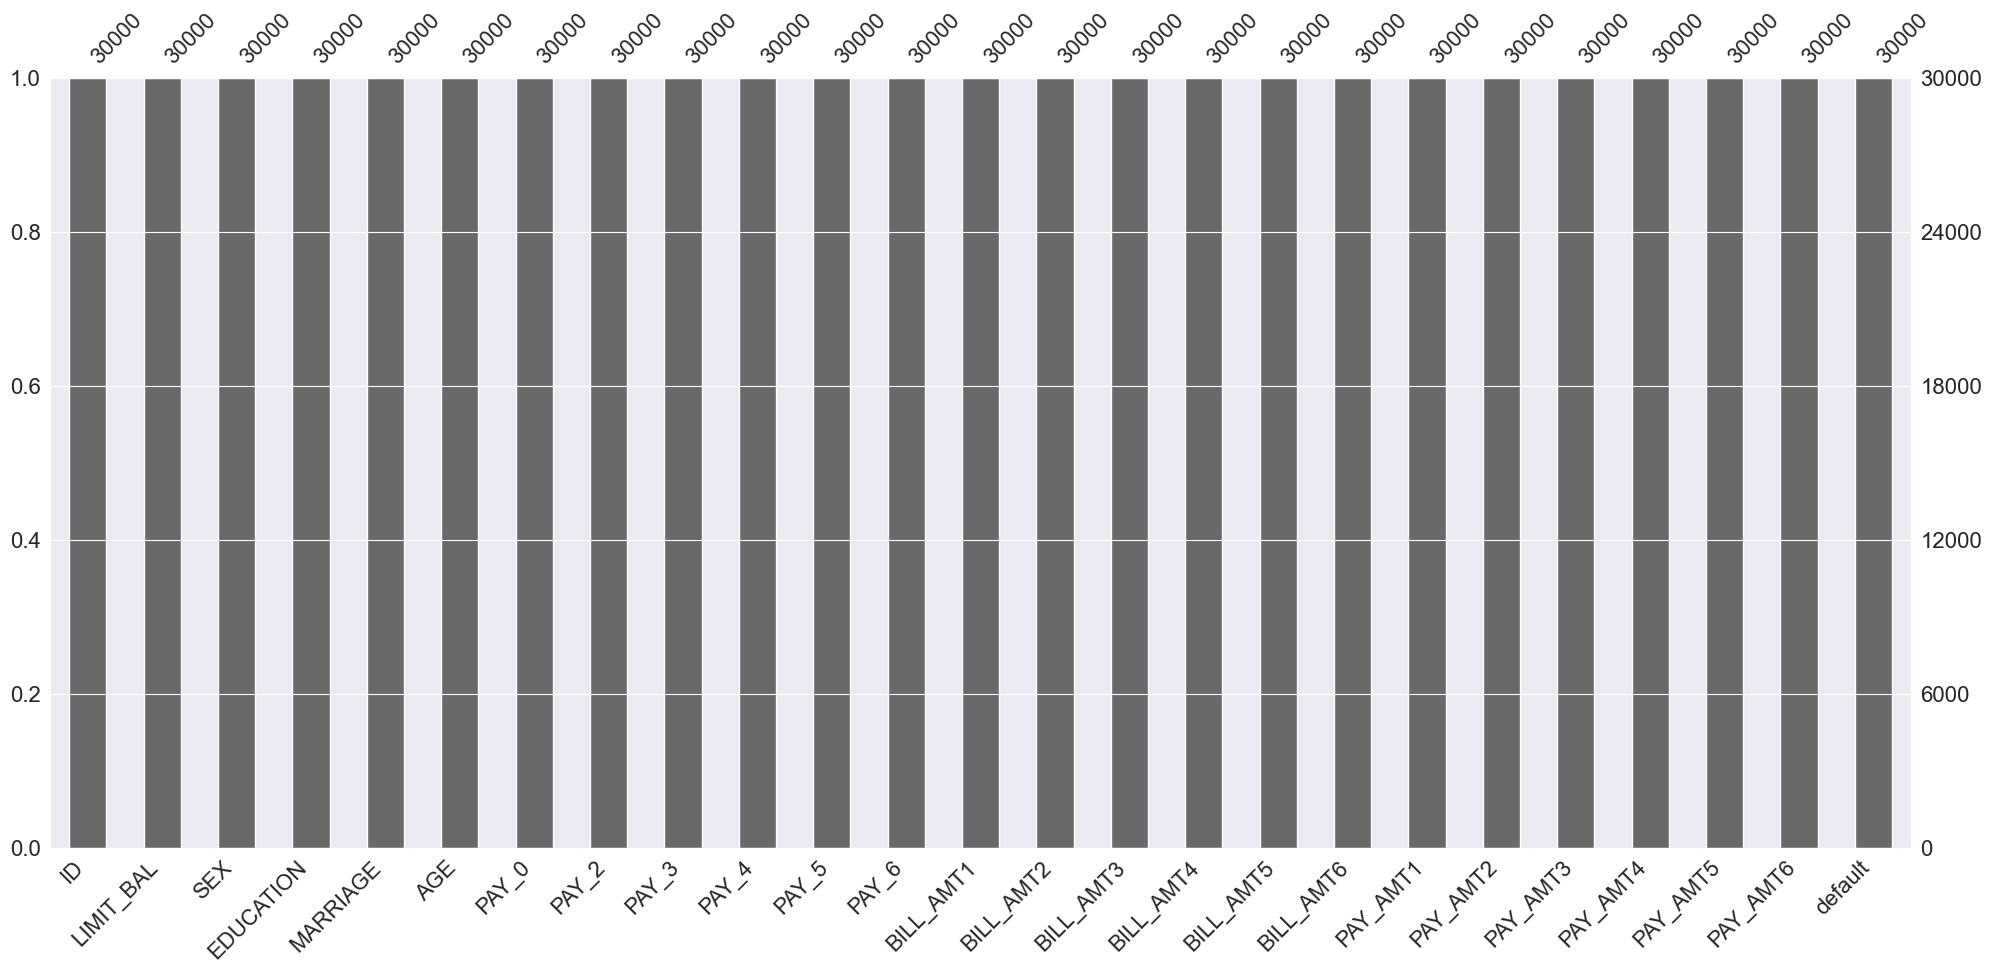

In [150]:
msno.bar(df)

In [151]:
df.default.value_counts()

default
0    23364
1     6636
Name: count, dtype: int64

In [152]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('default', axis = 1), df.default, random_state = 42)

In [153]:
params = {'max_depth': [2, 5, 10],
         'min_samples_split': [0.1, 0.2, 0.5],
          'criterion': ['gini', 'entropy'],
          'min_samples_leaf': [0.1, 0.5, 1]
         }

### Comparing Grid Searches

### Below, explore the four grid search options using the same parameter selections for the `DecisionTreeClassifier`. All of the grid searching tools have a `.cv_results_` attribute after fitting that contains information after fitting including time.  Use this to compare the time of each search and discuss what you believe the "best" approach to identifying the hyperparameters of the model are between:

#### - `GridSearchCV`
#### - `RandomizedSearchCV`
#### - `HalvingGridSearchCV`
#### - `HalvingRandomSearchCV`

### Share your results in a plot comparing the different times for searching across the different parameters as well as the score of the different estimators that resulted from the grid search.  

### GridSearchCV

In [154]:
start = time.time()
grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params).fit(X_train, y_train)
grid_train_acc = grid.score(X_train, y_train)
grid_test_acc = grid.score(X_test, y_test)
best_params = grid.best_params_
end = time.time()
grid_time = end - start

In [155]:
best_params

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 0.1}

In [156]:
grid_train_acc

0.8202666666666667

In [157]:
grid_test_acc

0.8197333333333333

### RandomizedSearchCV

In [158]:
start_randm = time.time()
randm = RandomizedSearchCV(DecisionTreeClassifier(random_state = 42), param_distributions=params).fit(X_train, y_train)
randm_train_acc = randm.score(X_train, y_train)
randm_test_acc = randm.score(X_test, y_test)
randm_best_params = randm.best_params_
end_randm = time.time()
randm_time = end_randm - start_randm

In [159]:
randm_best_params

{'min_samples_split': 0.1,
 'min_samples_leaf': 1,
 'max_depth': 10,
 'criterion': 'gini'}

In [160]:
randm_test_acc, randm_train_acc

(0.8197333333333333, 0.8202666666666667)

### HalvingGridSearchCV

In [161]:
start_search = time.time()
search = HalvingGridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params).fit(X_train, y_train)
search_train_acc = search.score(X_train, y_train)
search_test_acc = search.score(X_test, y_test)
search_best_params = search.best_params_
end_search = time.time()
search_time = end_search - start_search

In [162]:
search_best_params

{'criterion': 'entropy',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 0.1}

In [163]:
search_train_acc, search_test_acc

(0.8196, 0.8196)

### HalvingRandomSearchCV

In [164]:
start_rsearch = time.time()
rsearch = HalvingRandomSearchCV(DecisionTreeClassifier(random_state = 42), param_distributions=params).fit(X_train, y_train)
rsearch_train_acc = rsearch.score(X_train, y_train)
rsearch_test_acc = rsearch.score(X_test, y_test)
rsearch_best_params = rsearch.best_params_
end_rsearch = time.time()
rsearch_time = end_rsearch - start_rsearch

In [165]:
rsearch_best_params

{'min_samples_split': 0.5,
 'min_samples_leaf': 0.5,
 'max_depth': 2,
 'criterion': 'entropy'}

In [166]:
rsearch_train_acc, rsearch_test_acc

(0.7773777777777777, 0.7830666666666667)

In [167]:
models = ['GridSearchCV','RandomizedSearchCV','HalvingGridSearchCV','HalvingRandomSearchCV']
min_samples_split = [best_params['min_samples_split'], randm_best_params['min_samples_split'], search_best_params['min_samples_split'], rsearch_best_params['min_samples_split']]
max_depth = [best_params['max_depth'], randm_best_params['max_depth'], search_best_params['max_depth'], rsearch_best_params['max_depth']]
min_samples_leaf = [best_params['min_samples_leaf'], randm_best_params['min_samples_leaf'], search_best_params['min_samples_leaf'], rsearch_best_params['min_samples_leaf']]
criterion = [best_params['criterion'], randm_best_params['criterion'], search_best_params['criterion'], rsearch_best_params['criterion']]
test_acc = [grid_test_acc, randm_test_acc, search_test_acc, rsearch_test_acc]
train_acc = [grid_train_acc, randm_train_acc, search_train_acc, rsearch_train_acc]
execute_time = [grid_time, randm_time, search_time, rsearch_time]
model_metrics = {'models': models, 'min_samples_split': min_samples_split, 'max_depth': max_depth, 'min_samples_leaf':min_samples_leaf, 'criterion': criterion, 'test_accuracy': test_acc, 'train_accuracy': train_acc, 'runtime': execute_time}
df_metrics = pd.DataFrame(model_metrics)
df_metrics.set_index('models', inplace=True)
df_metrics

,min_samples_split,max_depth,min_samples_leaf,criterion,test_accuracy,train_accuracy,runtime
models,,,,,,,
GridSearchCV,0.1,2,1.0,gini,0.819733,0.820267,24.537660
RandomizedSearchCV,0.1,10,1.0,gini,0.819733,0.820267,4.499601
HalvingGridSearchCV,0.1,2,1.0,entropy,0.819600,0.819600,4.960104
HalvingRandomSearchCV,0.5,2,0.5,entropy,0.783067,0.777378,1.309381


In [168]:
create_table(df_metrics.sort_values(ascending=False, by=['train_accuracy']),index_title='Models',index=True)